<a href="https://colab.research.google.com/github/SeruiosBoss/AI3_1/blob/main/11/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_11_%D0%98%D0%BB%D1%8C%D0%BD%D1%83%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа 11. Метрические методы классификации

ФИО: **Мухамеджанов Ильнур Тимурович**

Группа: **ПИН-б-о-22-1**

## Задание, Вариант 16

1. Выполните `построение модели` классификации на основе `метода
ближайших соседей`. В ходе решения задачи необходимо решить следующие
подзадачи:
2. Построение `классификатора с заданием K` (количества ближайших
соседей) пользователем;
3. `Вычисление оценки hold-out` для различнх значений K, а также для
различных долей обучающей и тестирующей подвыборок;
4. `Вычисление оценки cross validation` для различных значений K, а также
для различных значений `fold` (количества подмножеств при кросс-валидации).
5. Вычислите `оптимальные значения K`. Обоснуйте свой выбор.
`Продемонстрируйте` использование полученного классификатора.

## Обозначение функций, Построение модели `методом ближайших соседей`, задание `K`, вычисление оценок `hold-out` и `cross validation` с различными значениями `fold`, `оптимальные` значения K

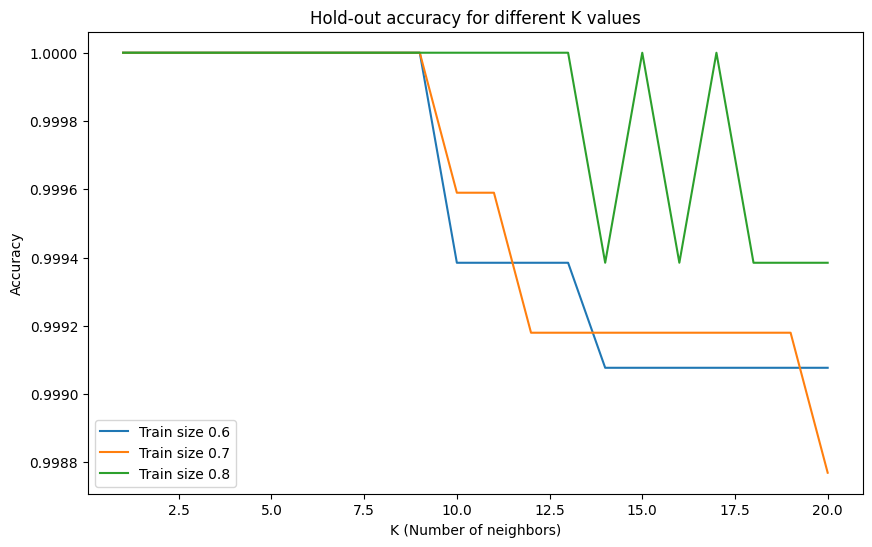

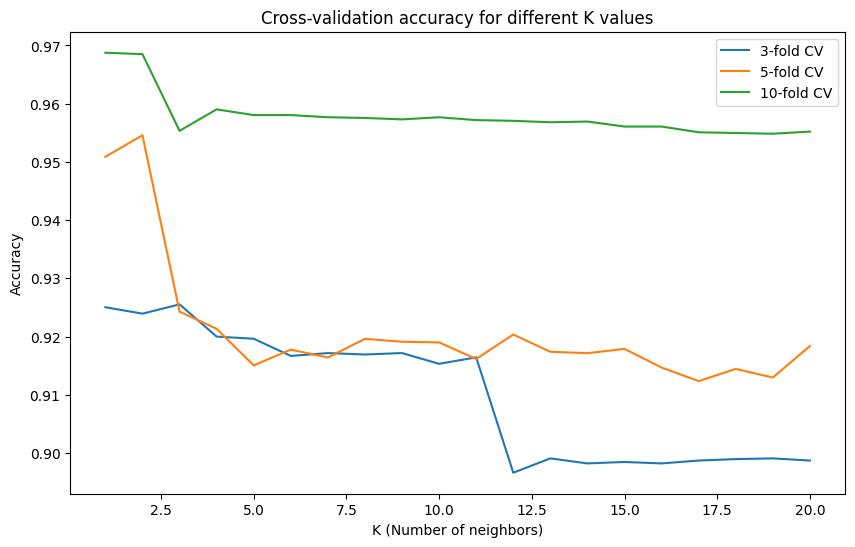

Оптимальные значения K для hold-out: {0.6: 1, 0.7: 1, 0.8: 1}
Оптимальные значения K для cross-validation: {3: 3, 5: 2, 10: 1}
Точность финального классификатора с K=2: 1.00


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Загрузка данных
attributes = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment",
    "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root",
    "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring",
    "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type",
    "spore-print-color", "population", "habitat"
]

data = pd.read_csv("agaricus-lepiota.data", header=None, names=attributes)

# Преобразование данных
# Преобразуем категориальные данные в числовые с помощью one-hot encoding
data_encoded = pd.get_dummies(data.drop('class', axis=1))
labels = data['class'].map({'e': 0, 'p': 1})  # Съедобные = 0, Ядовитые = 1

# 1. Построение классификатора
k_values = range(1, 21)
holdout_accuracies = []

# Разделение данных на обучающую и тестовую выборки (hold-out method)
train_sizes = [0.6, 0.7, 0.8]
optimal_k = {}

for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
        data_encoded, labels, test_size=1-train_size, random_state=42
    )

    accuracies = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))

    holdout_accuracies.append(accuracies)
    optimal_k[train_size] = k_values[np.argmax(accuracies)]

# 2. Построение графика точности hold-out
plt.figure(figsize=(10, 6))
for idx, train_size in enumerate(train_sizes):
    plt.plot(k_values, holdout_accuracies[idx], label=f'Train size {train_size}')

plt.title('Hold-out accuracy for different K values')
plt.xlabel('K (Number of neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 3. Кросс-валидация
folds = [3, 5, 10]
cross_val_accuracies = {}

for fold in folds:
    fold_accuracies = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, data_encoded, labels, cv=fold, scoring='accuracy')
        fold_accuracies.append(scores.mean())

    cross_val_accuracies[fold] = fold_accuracies

# Построение графика точности кросс-валидации
plt.figure(figsize=(10, 6))
for fold, accuracies in cross_val_accuracies.items():
    plt.plot(k_values, accuracies, label=f'{fold}-fold CV')

plt.title('Cross-validation accuracy for different K values')
plt.xlabel('K (Number of neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 4. Оптимальное значение K
cv_optimal_k = {fold: k_values[np.argmax(acc)] for fold, acc in cross_val_accuracies.items()}
print("Оптимальные значения K для hold-out:", optimal_k)
print("Оптимальные значения K для cross-validation:", cv_optimal_k)

# 5. Демонстрация использования оптимального классификатора
final_k = cv_optimal_k[5]  # Например, выбираем оптимальное K для 5-fold CV
final_knn = KNeighborsClassifier(n_neighbors=final_k)
final_knn.fit(X_train, y_train)
final_accuracy = accuracy_score(y_test, final_knn.predict(X_test))

print(f"Точность финального классификатора с K={final_k}: {final_accuracy:.2f}")


В данной работе были использованы библиотеки `numpy, matplotlib, pandas, sklearn` и модули `pyplot, train_test_split, cross_val_score, KNeighborsClassifier accuracy_score` для построения модели методом ближайших соседей, задания `K`, вычисления оценок `hold-out` и `cross validation` с различными значениями `fold`, `оптимальные` значения K

### 1. **Поясните особенности основных методов метрической классификации: метод ближайшего соседа, метод \(k\) ближайших соседей.**  
- **Метод ближайшего соседа:**  
  - Для классификации нового объекта определяется ближайший объект в обучающей выборке на основе выбранной метрики расстояния (например, евклидово расстояние).  
  - Класс нового объекта совпадает с классом ближайшего соседа.  
  - Простой, но чувствительный к шуму метод.  

- **Метод \(k\) ближайших соседей (kNN):**  
  - Для классификации нового объекта рассматриваются \(k\) ближайших соседей.  
  - Класс определяется голосованием: выбирается класс, который чаще встречается среди соседей.  
  - Уменьшает влияние шума в данных по сравнению с методом ближайшего соседа.  
  - Требует выбора параметра \(k\) и метрики расстояния.  

---

### 2. **Поясните основные принципы и этапы реализации метода kNN.**  
1. **Выбор параметров:**  
   - Определить \(k\) (количество соседей).  
   - Выбрать метрику расстояния (евклидово, манхэттенское и др.).  

2. **Сбор и подготовка данных:**  
   - Разделить данные на обучающую и тестовую выборки.  
   - Нормализовать или стандартизировать данные (особенно при использовании метрик, чувствительных к масштабу).  

3. **Для каждого объекта тестовой выборки:**  
   - Вычислить расстояния до всех объектов обучающей выборки.  
   - Найти \(k\) ближайших соседей.  
   - Определить класс нового объекта на основе голосования соседей.  

4. **Оценка качества модели:**  
   - Использовать метрики точности, F1-меру или ROC-AUC.  

---

### 3. **Поясните принцип выбора количества соседних объектов \(k\), по которым определяется принадлежность целевого объекта к результирующему классу.**  
- **Малое \(k\):**  
  - Модель становится чувствительной к шуму.  
  - Риск переобучения (high variance).  

- **Большое \(k\):**  
  - Снижается влияние шума.  
  - Модель может быть слишком обобщенной (high bias).  

- **Оптимальный выбор \(k\):**  
  - Зависит от объема и структуры данных.  
  - Обычно \(k\) выбирают на основе кросс-валидации.  
  - Часто используется \(k = \sqrt{N}\), где \(N\) — размер обучающей выборки.  

---

### 4. **В чем заключается метод парзеновского окна?**  
- **Суть метода:**  
  - Это метод оценки плотности распределения.  
  - Вместо фиксированного числа соседей (\(k\)) используется фиксированное окно (радиус).  
  - Класс определяется на основе количества объектов в пределах окна.  

- **Формула плотности:**  
  \[
  f(x) = \frac{1}{Nh} \sum_{i=1}^{N} K\left(\frac{x - x_i}{h}\right)
  \]  
  где \(h\) — ширина окна, \(K\) — ядро (например, гауссово).  

- **Особенность:**  
  - Ширина окна сильно влияет на результат:  
    - Узкое окно учитывает только ближайших соседей.  
    - Широкое окно захватывает больше объектов, но снижает точность локального предсказания.  

---

### 5. **Поясните принцип метода потенциальных функций.**  
- **Суть метода:**  
  - Каждому объекту в обучающей выборке присваивается **потенциальная функция**.  
  - Потенциал зависит от расстояния между объектами:  
    - Близкие к целевому объекту точки имеют больший вес.  
  - Класс нового объекта определяется суммой вкладов (потенциалов) соседей.  

- **Формула:**  
  \[
  f(x) = \sum_{i=1}^{N} \alpha_i K(||x - x_i||)
  \]  
  где \(\alpha_i\) — потенциалы, \(K\) — ядро, \(||x - x_i||\) — расстояние.  

- **Особенность:**  
  - Метод хорошо работает в условиях шумных данных.  
  - Сложность — в выборе подходящего ядра и параметров потенциала.  

---

### 6. **Какие параметры оптимизируют в методах kNN?**  
1. **Количество соседей (\(k\)):**  
   - Определяет баланс между переобучением и недообучением.  

2. **Метрика расстояния:**  
   - Евклидово расстояние, манхэттенское, косинусное и др.  
   - Выбор метрики зависит от природы данных (например, для категориальных признаков подходят метрики на основе схожести).  

3. **Вес соседей:**  
   - Равномерные веса или взвешивание в зависимости от расстояния.  

4. **Метод предобработки данных:**  
   - Нормализация или стандартизация (особенно для метрик, чувствительных к масштабу).